# Marketing Campaign Results

## Contents
* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [Data Exploration](#Data-Exploration)
* [Question 1](#Question-1)
* [Question 2](#Question-2)

## Assignment
Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

Using the three datasets given:

1. Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

2. Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

3. How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

## Data Description
Attached you will find three files with the data you will need to complete the analysis.

### client_data.csv: You will find data specific to fictional clients

**client_id:** Randomly generated unique surrogate identifier for a client

**client_geographical_region:** Client geographical location in relation to U.S. Census definitions

**client_residence_status:** Client residence status in relation to whether they rent or own

**client_age:** Client age in relation to date of birth


### deposit_data.csv: You will find data specific to the client deposit behavior

**client_id:** Randomly generated unique surrogate identifier for a client

**deposit_type:** Delineates whether a client deposit is the scheduled record or actual record

**deposit_amount:** Client deposit amount to the dedicated bank account with Freedom

**deposit_cadence:** Timing and pattern of client deposit activity

**deposit_date:** Deposit date for deposit type


### calendar_data.csv: This is a calendar reference table

**gregorian_date:** This date aligns with the Gregorian calendar

**month_name:** These are the designated months in the case study
   * Month 1 and 2 are pre-campaign
   * Month 3 is the campaign
   * Month 4 and 5 are post-campaign

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
client_data = pd.read_csv('client_data.csv')
client_data.head(3)

,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84


In [3]:
deposit_data = pd.read_csv('deposit_data.csv')
deposit_data.head(3)

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23


In [4]:
calendar_data = pd.read_csv('calendar_data.csv')
calendar_data.head(3)

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1


In [5]:
data = client_data.merge(deposit_data, on = 'client_id')
data.head(3)

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26


In [6]:
data = data.merge(calendar_data, left_on = 'deposit_date', right_on = 'gregorian_date', copy = False)
data.head(3)

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2


In [7]:
data.drop(columns = 'gregorian_date', inplace = True)
data.head(3)

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2


In [8]:
data['month_name'].value_counts()

Month 3    108505
Month 4    107494
Month 5    106363
Month 2     80205
Month 1     77827
Name: month_name, dtype: int64

In [9]:
data['client_geographical_region'].value_counts()

West         205629
South        108004
Midwest       88185
Northeast     78576
Name: client_geographical_region, dtype: int64

In [10]:
data['client_residence_status'].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [11]:
print('Min date = ', data['deposit_date'].min())
print('Max date = ', data['deposit_date'].max())

Min date =  2019-06-01
Max date =  2019-10-31


In [12]:
data['deposit_date'] = pd.to_datetime(data['deposit_date'])

In [13]:
data['deposit_type'].value_counts()

Scheduled Deposit    247986
Actual Deposit       232408
Name: deposit_type, dtype: int64

In [14]:
data['deposit_cadence'].value_counts()

Monthly     262858
Biweekly    209189
Extra         8347
Name: deposit_cadence, dtype: int64

In [15]:
data.describe()

,client_id,client_age,deposit_amount
count,4.803940e+05,480394.000000,480394.000000
mean,4.992809e+14,52.192469,365.207130
std,2.899833e+14,13.773928,346.644434
min,1.460463e+11,21.000000,0.010000
25%,2.477689e+14,41.000000,200.000000
50%,5.015297e+14,52.000000,290.000000
75%,7.503108e+14,62.000000,452.000000
max,9.999856e+14,105.000000,30000.000000


<Axes: ylabel='Frequency'>

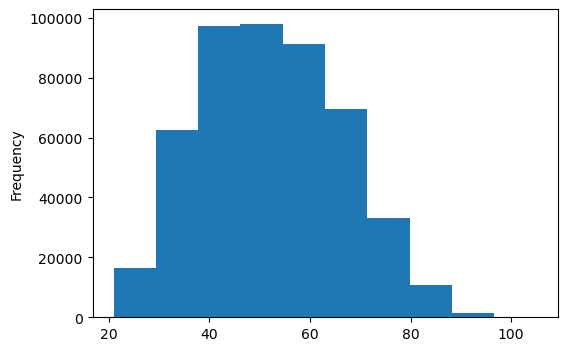

In [16]:
data['client_age'].plot(kind = 'hist', figsize = (6,4))

In [17]:
deposit_amount_by_month = data.groupby(by = data['month_name'])['deposit_amount'].sum()
print(deposit_amount_by_month)

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


Text(0, 0.5, 'Deposit amount')

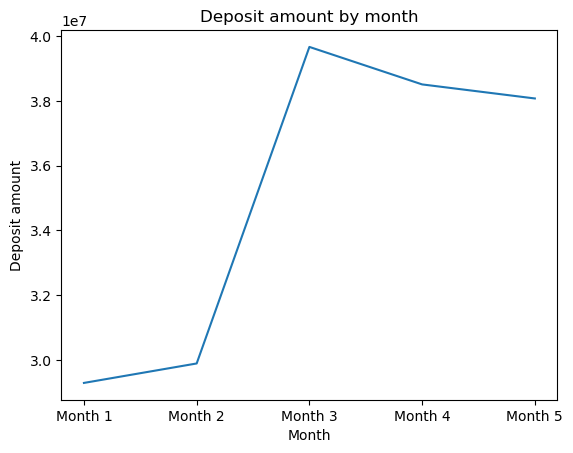

In [18]:
plt.plot(deposit_amount_by_month)
plt.title('Deposit amount by month')
plt.xlabel('Month')
plt.ylabel('Deposit amount')

In [19]:
number_of_deposits_by_month = data.groupby(by = data['month_name']).size()

Text(0, 0.5, 'Number of deposits')

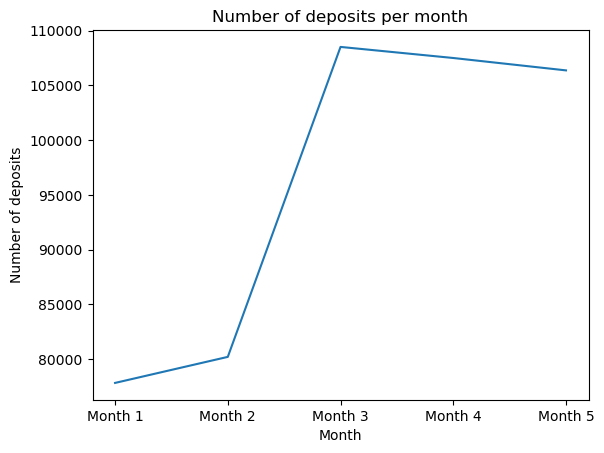

In [20]:
plt.plot(number_of_deposits_by_month)
plt.title('Number of deposits per month')
plt.xlabel('Month')
plt.ylabel('Number of deposits')

In [21]:
deposit_amount_by_type = data.groupby(by = data['deposit_type'])['deposit_amount'].sum()

Text(0, 0.5, 'Deposit type')

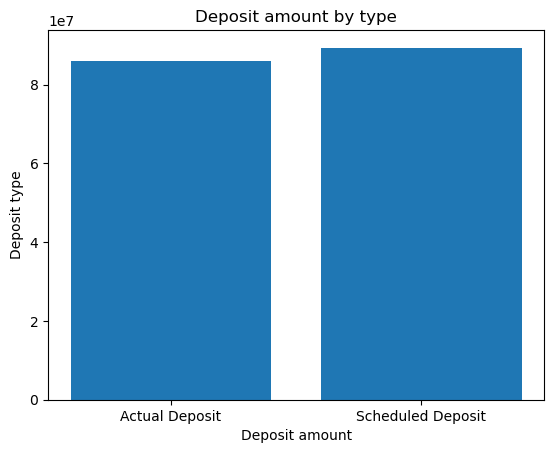

In [22]:
plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)
plt.title('Deposit amount by type')
plt.xlabel('Deposit amount')
plt.ylabel('Deposit type')

In [23]:
deposit_amount_by_cadence = data.groupby(by = data['deposit_cadence'])['deposit_amount'].sum()

Text(0, 0.5, 'Deposit cadence')

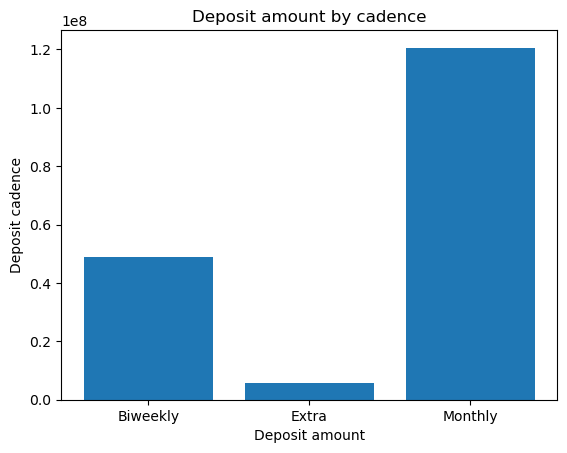

In [24]:
plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)
plt.title('Deposit amount by cadence')
plt.xlabel('Deposit amount')
plt.ylabel('Deposit cadence')

In [25]:
deposit_amount_per_month_and_cadence = data.groupby(by = [data['deposit_cadence'], data['month_name']])['deposit_amount'].sum()

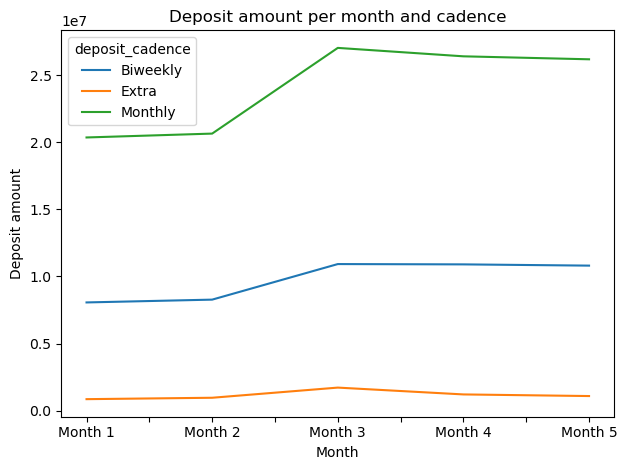

In [26]:
ax = deposit_amount_per_month_and_cadence.unstack(level = 0).plot(kind = 'line')
ax.set_xlabel('Month')
ax.set_ylabel('Deposit amount')
ax.set_title('Deposit amount per month and cadence')
plt.tight_layout()

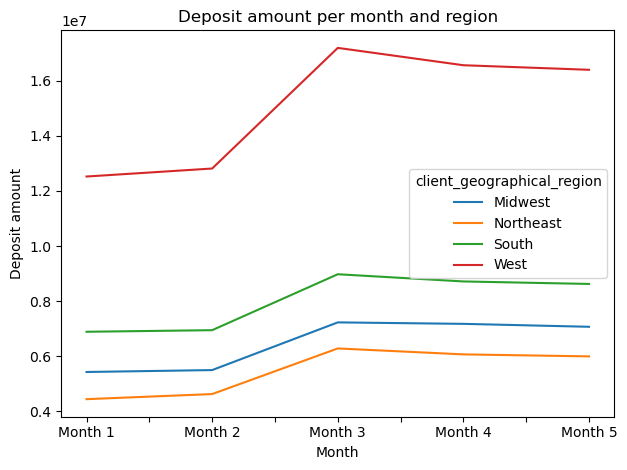

In [27]:
deposit_amount_per_month_and_region = data.groupby(by = [data["client_geographical_region"], data["month_name"]])["deposit_amount"].sum()

ax = deposit_amount_per_month_and_region.unstack(level = 0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and region")
plt.tight_layout()

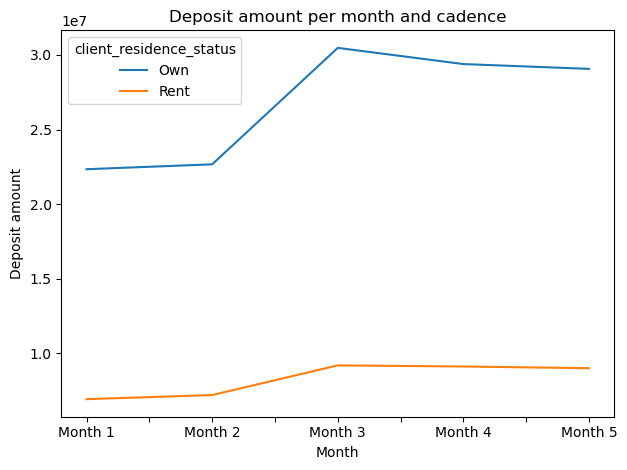

In [28]:
deposit_amount_per_month_and_cadence = data.groupby(by=[data["client_residence_status"], data["month_name"]])["deposit_amount"].sum()

ax = deposit_amount_per_month_and_cadence.unstack(level=0).plot(kind='line')

ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and cadence")
plt.tight_layout()

## Question 1
Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

This question can already be answered from the plots in the previous sections, especially the ones that show the deposit amount per month. We know that the ad campaign was running during the 3rd month of our data set (which is Month 8 in the current year, i.e., August). A huge spike can be noticed in the line plot titled "Deposit amount per month" between months 7 & 8, i.e., while the campaign was running. Since then, the deposit amount has been slowly decreasing but has remained at very higher levels than before the campaign. To put this into numbers:

*  During the month the campaign was running, Freedom Debt Relief received almost `$10 million` dollars increase in deposit amounts than previous months.

* In the months following the campaign, the total deposit amount start to slowly decrease, but is still at higher levels than before the ad campaign: `$ 8.5 milion` in the month immediately following the campaign, and `$8 million` in the last month of the data.

* The cost of the campaign was `$5 million`, and the incurred deposit amount increased by a total of `$26.5 million`. A quick Google search for "freedom debt relief pricing" reveals an `18-25%` fee incurred by the company for its services. We would assume that this is based on the residence status and the deposit cadence, but neither the data nor the task description provide any estimate or hint to this. Assuming the lowest,`18%` fee for all clients, we observe an increase in profits to `$4.77 million (26.5M * 18%`. While this looks like a loss of `$230` for the campaign, it is important to note that the trend shows this would have been much higher without the campaign, and it is very unlikely that the minimum fee is applied to all clients, so this number should be treated as the most pessimistic estimate.

In [29]:
# Clients that have made any deposit in the first two months
clients_before_campaign = data[(data["month_name"] == "Month 1")
                           | (data["month_name"] == "Month 2")]["client_id"].unique()
clients_before_campaign.shape

(34051,)

In [30]:
# Clients that have made any deposit in the third month
clients_during_campaign = data[(data["month_name"] == "Month 3")]["client_id"].unique()
clients_during_campaign.shape

(43806,)

In [31]:
# Clients that have made any deposit after the campaign
clients_after_campaign = data[(data["month_name"] == "Month 4")
                          | (data["month_name"] == "Month 5")]["client_id"].unique()
clients_after_campaign.shape

(41862,)

#### Question: How many new clients were acquired while the ad campaign was running?

A new client is one that has made his first deposit while the campaign was running.

* This is not necessarily correct, i.e., a client could have made deposits in the past, but since we do not have data for it we will assume that he hasn't made any.

#### Answer:

In [32]:
# Convert arrays to sets, and find their difference
len(set(clients_during_campaign).difference(set(clients_before_campaign)))

11544

#### Question: How many after the campaign?

#### Answer:

In [33]:
len(
    set(clients_after_campaign).difference(set(clients_before_campaign).union(set(clients_during_campaign)))
)

752

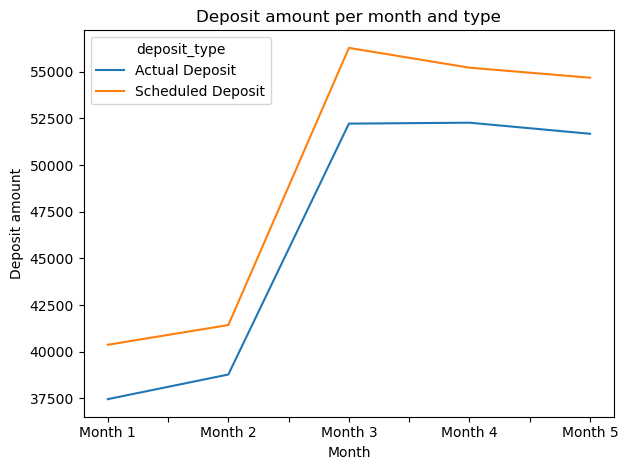

In [34]:
deposit_amount_per_month_and_type = data.groupby(by = [data["deposit_type"], data["month_name"]])["deposit_type"].count()

ax = deposit_amount_per_month_and_type.unstack(level=0).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Deposit amount")
ax.set_title("Deposit amount per month and type")
plt.tight_layout()

During the ad campaign, the number of actual and scheduled deposits increases by 25%, or 10K transactions, and while it gradually decreases in the next two months, it remains very high, at above 50K deposits per type each, while the pre-campaign levels were at around 40K.

## Question 2
Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?